In [1]:
import pandas as pd

### 1. Get the data. Download train.csv training houseprice data (which came from Kaggle) and load into a Pandas data frame.


In [6]:
df= pd.read_csv("train.csv")


### 2. Find your variables. Look at the data and check the documentation to identify a column that indicates price and one that indicates area. GrLivArea and SalePrice are good ones to use.


In [8]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### 3. Check out your variables. Create a scatterplot to see if there's appears to be a relationship between these two variables. Tips: Use transparency and zoom in on the details by removing the outliers from the scatterplot using a Pandas filter, setting the scale of the axes or using an interactive plot. Does there appear to be a relationship? Also, plot the distributions (histgrams and/or box plots).

In [18]:
df1= df[['GrLivArea','SalePrice']]

In [25]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [23]:
z_scores = stats.zscore(df1)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]

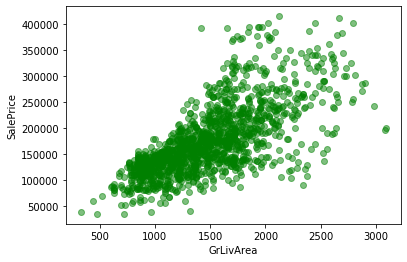

In [42]:
plt.scatter(new_df['GrLivArea'],new_df['SalePrice'], lw=1, color="green", alpha=0.5)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

### 4. Build a simple linear regression model. Assuming you think there's a relationship (there is!), build a regression model that predicts price from floor area in order to see how the variation in price can be explained by floor area. Use the SciKit-Learn's example. Determine your independent variable (x) and dependent variable (y), create a new linear model object and use its fit() function to fit the model and extract the two parameters (intersept and slope). Interpret these - what do they tell you about the relationship between floor area and price? Tip, fit() needs a list of 1 independent variable - you can use double square brackets like this: dataframe[['VARNAME']]


In [43]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
x= new_df[['GrLivArea']]
y= new_df[['SalePrice']]

In [48]:
new_df.shape

(1429, 81)

In [53]:
X_test = x[:-1000]
X_train = x[-1000:]
y_test = y[:-1000]
y_train = y[-1000:]



In [47]:
regr = linear_model.LinearRegression()


In [57]:
regr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
regr.intercept_

array([33418.32175122])

In [64]:
regr.coef_

array([[95.17970085]])

### 5. Quantify the variation in price due to floor area. Use the score() function to get the R2 value. How much of the variation is explained by floor area?

In [67]:
regr.score(X_test, y_test)

0.5415226626481743

### 6. Predict price from floor area using this model and compare with observed. Add a new column of predicted prices using LinearRegression's predict() function. Plot a scatterplot with the floorspace vs price and floorspace vs predicted price on the same axis with different coloured dots. How's the model look?


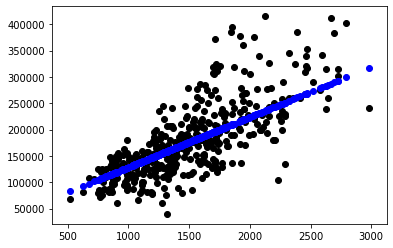

In [73]:
y_pred = regr.predict(X_test)

# Plot outputs
plt.scatter(X_test,y_test, color="black")
plt.scatter(X_test, y_pred, color="blue")

plt.show()

### 7. Calculate residuals. Add a new column of residuals (observed minus predicted values). Look at the means and distributions and comment on the effect size - does it predict within a reasonable margin?


In [78]:
residual = (y_test - y_pred)
residual.mean()


SalePrice    2676.838399
dtype: float64

yes its predicting with the mrgin of 2676.83

# Multiple linear regression

In [82]:
numeric_features = df.select_dtypes(include=[np.number])
corr = numeric_features.corr()


### 1. print (corr['SalePrice'].sort_values(ascending=False)[:10], '\n') #top 10


In [84]:
print (corr['SalePrice'].sort_values(ascending=False)[:10], '\n') 

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64 



### 2. Choose another variable to add to the model. Choose another variable to find to account for more of the variation. Choose a highly correlated variable but check it's not too correlated to your floor area variable (correlation of <0.5 should be OK). Also check that it seems a reasonable predictor variable.

In [87]:
print (corr['GrLivArea'].sort_values(ascending=False), '\n') 

GrLivArea        1.000000
TotRmsAbvGrd     0.825489
SalePrice        0.708624
2ndFlrSF         0.687501
FullBath         0.630012
OverallQual      0.593007
1stFlrSF         0.566024
BedroomAbvGr     0.521270
GarageArea       0.468997
GarageCars       0.467247
Fireplaces       0.461679
TotalBsmtSF      0.454868
HalfBath         0.415772
LotFrontage      0.402797
MasVnrArea       0.390857
OpenPorchSF      0.330224
YearRemodAdd     0.287389
LotArea          0.263116
WoodDeckSF       0.247433
BsmtUnfSF        0.240257
GarageYrBlt      0.231197
BsmtFinSF1       0.208171
YearBuilt        0.199010
PoolArea         0.170205
LowQualFinSF     0.134683
ScreenPorch      0.101510
KitchenAbvGr     0.100063
MSSubClass       0.074853
MoSold           0.050240
BsmtFullBath     0.034836
3SsnPorch        0.020643
EnclosedPorch    0.009113
Id               0.008273
MiscVal         -0.002416
BsmtFinSF2      -0.009640
BsmtHalfBath    -0.018918
YrSold          -0.036526
OverallCond     -0.079686
Name: GrLivA

### 3. Create a new model with two independent variables Create a new model with two independent variables with one you used before and the one you just selected

In [88]:
x= new_df[['GrLivArea','GarageArea']]
y= new_df[['SalePrice']]

new_df.shape

X_test = x[:-1000]
X_train = x[-1000:]
y_test = y[:-1000]
y_train = y[-1000:]



regr = linear_model.LinearRegression()


regr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 4. Check the R2. Does the model capture more of the variation?



In [91]:
regr.score(X_test, y_test)

0.6831809815710449

In [92]:
#yes it covers more variaion.

### 5. Check the parameters. Try to interpret the parameters. There are two slopes now, one for each variable. Also, note that these variables are in different units, so this affects the interpretation of these parameters (they can't be compared to each other unless you normalise the variables). These are tricky to interpret because they interact with each other.


In [94]:
regr.intercept_

array([10063.45594517])

In [95]:
regr.coef_

array([[ 71.05732061, 125.78225019]])

### 6. Study residuals. See how the residuals vary by some category e.g. Neighborhood. This will tell which types of house are poorly modelled and this may give some clues for our analysis. For example, we might model some subsets separately or exclude some subset for our analysis.

In [99]:
y_pred= regr.predict(X_test)
residual = (y_test - y_pred)
residual.mean()


SalePrice    4369.506197
dtype: float64

# Exercise 2: Linear regression to analyse relationships between crimes and socioeconomic characteristics

## Simple Linear Regression


### 1. Load Data. Load the Communities in the US (cleaned version) into a Pandas dataframe.


In [103]:
df= pd.read_csv("censusCrimeClean.csv")


### 2. Choose two columns and save as variables. You can choose any but an interesting pair could be "medIncome" and "ViolentCrimesPerPop" 3. Choose suitable variables. Use the information here to help identify one dependent and one independent variable.


In [106]:
df.head()

,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [114]:
x=df[['medIncome']]
y= df[["ViolentCrimesPerPop"]]

### 4. Fit a model and inspect the parameters. Fit a simple linear regression model using either scikit (see above) or scipy.stats.linregress() function to perform a linear regression. Show the model parameters produced.

In [117]:
regr = linear_model.LinearRegression()


regr.fit(x,y)


intercept=regr.intercept_
print(intercept)

coef=regr.coef_
print(coef)

[0.40846004]
[[-0.47208549]]


### 5. Calculate a regression line. Use Numpy's polyval() function to calculate a regression line. The code below will calculate dependent variable values for each independent variable value.modelledDependent = np.polyval([slope, intercept], independentColumn) Then plot it on a scatterplot.

In [119]:
modelledDependent = np.polyval([coef, intercept],df['medIncome'])
modelledDependent

array([0.23378840861315794, 0.26211353819065986, 0.2668343931202435, ...,
       0.26211353819065986, 0.2007424241060724, 0.21962584382440697],
      dtype=object)

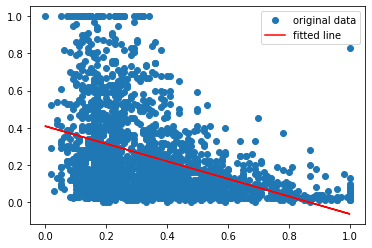

In [123]:
plt.plot(x, y, 'o', label='original data')
plt.plot(x, regr.intercept_ + regr.coef_*x, 'r', label='fitted line')
plt.legend()
plt.show()

In [126]:
pCoeff = np.polyfit(df['medIncome'], df['ViolentCrimesPerPop'], 2)

### 6. evaluatedCurve = np.polyval(pCoeff, column1)

In [129]:
evaluatedCurve = np.polyval(pCoeff, df['medIncome'])
evaluatedCurve

array([0.21348816, 0.24822959, 0.25433225, ..., 0.24822959, 0.177018  ,
       0.19732251])

## Multiple Linear Regression

In [134]:
import statsmodels.api as sm

In [137]:
x= new_df[['GrLivArea','GarageArea']]
y= new_df[['SalePrice']]


In [138]:
model = sm.OLS(y,x)

In [139]:
results = model.fit()

In [142]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                          1.402e+04
Date:                Thu, 11 Nov 2021   Prob (F-statistic):                        0.00
Time:                        14:31:09   Log-Likelihood:                         -17215.
No. Observations:                1429   AIC:                                  3.443e+04
Df Residuals:                    1427   BIC:                                  3.444e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GrLivArea     76.3269      1.854     41.159      0.000      72.689      79.965
GarageArea   133.0063      5.643     23.571      0.000     121.937     144.075
==============================================================================
Omnibus:                      108.764   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              431.239
Skew:                           0.257   Prob(JB):                     2.28e-94
Kurtosis:                       5.642   Cond. No.                         8.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""